# 로지스틱 회귀 (Logistic Regression)

## 분류 (Classification)

* 예시
  * 이메일 : 스팸 / 스팸 아님
  * 온라인 거래 : 도용 / 도용 아님
  * 종양 : 심각함(Malignant) / 심각하지 않음(Benign)

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

print(breast_cancer.DESCR)

import pandas as pd

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['malignant'] = 1 - breast_cancer.target # 0 for malignant and 1 for benign in the original dataset

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

### 특징

반응변수(y)가 0 또는 1의 값을 가진다.

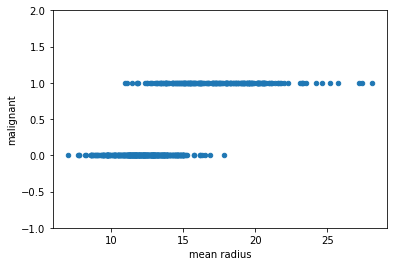

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

data.plot(x='mean radius', y='malignant', kind='scatter', ylim=[-1,2])

선형 회귀 (Linear Regression)으로 하면 어떨까?

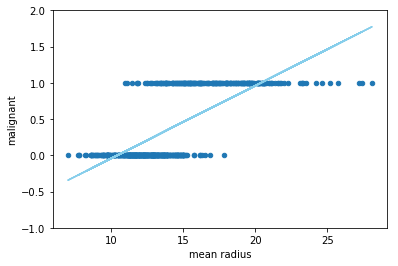

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data[['mean radius']], data['malignant'])

data.plot(x='mean radius', y='malignant', kind='scatter', ylim=[-1,2])
plt.plot(data['mean radius'], lr.predict(data[['mean radius']]), 'skyblue');

  * 선형회귀로 모델을 만든 다음에 $h_\theta(x) = 0.5$보다 작으냐 크냐로 y값을 예측한다.
  * 못 할 건 없지만
  * y는 0 또는 1이다.
  * $h_\theta(x) $이 0보다 작거나 1보다 큰 것은 이상하다.
  * 그래서 $1 \geq h_\theta(x) \geq 0$인 모델이 필요하다.
  * 로지스틱 회귀 (Logistic Regree) 는 $1 \geq h_\theta(x) \geq 0$로 만들어준다.

## 가설 (Hypothesis Representation)

### Goal
$$1 \geq h_\theta(x) \geq 0$$

### Solution 
$$g(\theta^Tx)$$

###  Sigmoid function (Logistic function)

  $$
  g(z) = \frac{1}{1 + e^{-z}}
  $$

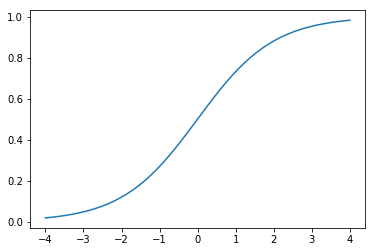

In [5]:
import numpy as np
z = np.linspace(-4, 4)
plt.plot(z, [1/(np.e**(-i) + 1) for i in z])

* 항상 0보다 크고 1보다 작은 숫자

### 가설 해석하기

$h_\theta(x)$ : 입력값 x에 대해서 y=1일 확률의 추정값

예컨대, 0.7이면 70%의 확률로 심각한 종양


$h_\theta(x) = P(y=1|x;\theta)$: 입력값 x와 매개변수 $\theta$가 주어졌을  때 y = 1일 확률

### 어떻게 이게 확률인가요?

확률 : 0보다 같거나 크고, 다 더해서 1이 되면 됨

## Decision boundary

로지스틱 회귀 (Logistic regression)는 $h_\theta(x)$ >= 0.5일 때 y=1로 예측한다.

이는 $\theta^Tx$ > 0일 때와 같다.

In [6]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
data_sample = data.sample(50, random_state=1)
x1_range = np.linspace(data_sample['mean radius'].min()-1, data_sample['mean radius'].max()+1, num=1000)
x2_range = np.linspace(data_sample['mean texture'].min()-1, data_sample['mean texture'].max()+1, num=1000)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_range = np.stack([x1_grid.ravel(), x2_grid.ravel()], axis=1)

In [ ]:
# decision bounndary
y_hat = np.array([1 if 1*x[0] + x[1] - 50 > 0 else 0 for x in X_range])

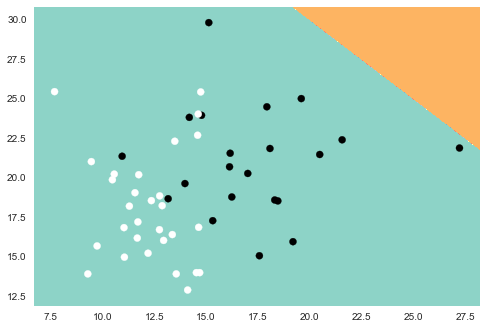

In [8]:
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(x1_grid, x2_grid, y_hat.reshape(x1_grid.shape), cmap=cmap)

plt.scatter(data_sample['mean radius'], data_sample['mean texture'], c=data_sample['malignant'], s=50)
plt.grid(False)
plt.show()

## Non-linear decision boundary

In [ ]:
# decision bounndary
y_hat = np.array([1 if x[0] + x[0]**2 + x[1] + x[1]**2 - 800 > 0 else 0 
                  for x in X_range])

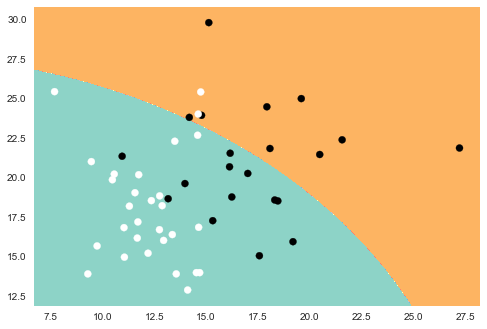

In [10]:
plt.contourf(x1_grid, x2_grid, y_hat.reshape(x1_grid.shape), cmap=cmap)

plt.scatter(data_sample['mean radius'], data_sample['mean texture'], c=data_sample['malignant'], s=50)
plt.grid(False)
plt.show()

## Cost function

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}
$$

### 매개변수 (parameters) $\theta$를 어떻게 구할까?

$$
Cost(h_\theta(x^{(i)}), y^{(i)})) = \begin{cases}
  -\log(h_\theta(x^{(i)})), & \text{if } y = 1 \\
  -\log(1 -h_\theta(x^{(i)})), & \text{if } y = 0
\end{cases}
$$

* y = 1일 때, $h_\theta(x)$ = 1이면 cost가 0이고, $h_\theta(x)$ = 1에서 멀어질 수록 무한대에 가까워진다.
* y = 0일 때, $h_\theta(x)$ = 0이면 cost가 0이고, $h_\theta(x)$ = 0에서 멀어질 수록 무한대에 가까워진다.
* 맞추면 cost가 0, 많이 틀릴 수록 cost를 많이 준다는 것을 알 수 있다.

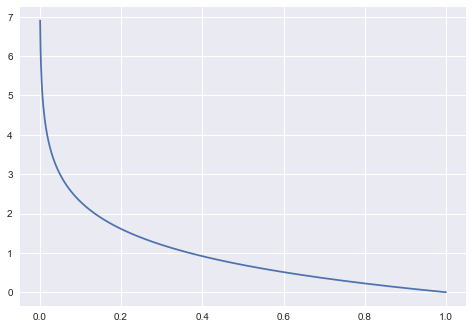

In [18]:
h_range = np.linspace(0.001, 0.999, num=1000)
plt.plot(h_range, -np.log(h_range))

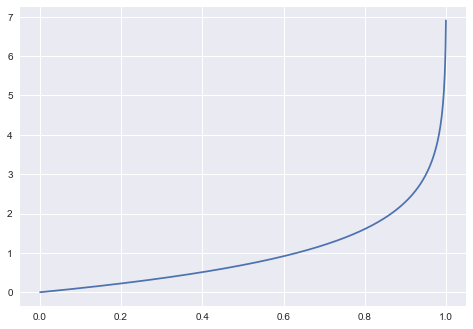

In [19]:
plt.plot(h_range, -np.log(1 - h_range))

### Simplified cost function

$$
J(\theta) = \frac{1}{n}\sum_{i=1}^{n}Cost(h_\theta(x^{(i)}, y^{(i)}))
$$

$$
Cost(h_\theta(x^{(i)}), y^{(i)})) = \begin{cases}
  -\log(h_\theta(x^{(i)})), & \text{if } y = 1 \\
  -\log(1 -h_\theta(x^{(i)})), & \text{if } y = 0
\end{cases}
$$

$$
Cost(h_\theta(x^{(i)}), y^{(i)})) = -y\log(h_\theta(x^{(i)})) - (1-y)log(1 - h_\theta(x^{(i)}))
$$

* y = 1일 때, y = 0일 때 두 식이 같아진다.

# In code

In [10]:
X = data.drop('malignant', axis=1)
y = data['malignant']

In [11]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [31]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(C=1.0)

In [37]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
model.score(X_train, y_train)

0.971830985915493

In [39]:
model.score(X_test, y_test)

0.94405594405594406

In [40]:
from sklearn.linear_model import LogisticRegressionCV

In [41]:
model = LogisticRegressionCV()

In [42]:
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [43]:
model.score(X_train, y_train)

0.971830985915493

In [44]:
model.score(X_test, y_test)

0.94405594405594406